# Astr 630 Homework 3

#### Problem 1c

In [27]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (16, 10)


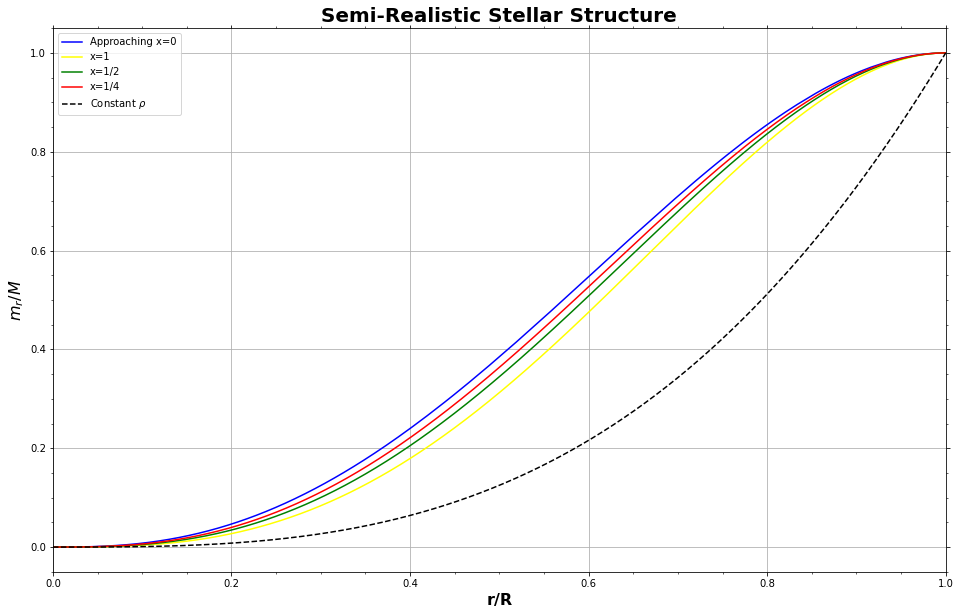

In [80]:
def mr_M(x, r): #r is actually r/R
    d = 1 - ((3/(x+3))*r**x)
    b = 1+(3/x)
    M = (r**3)*b*d
    return M

r = np.linspace(0, 1, 10000) #range needs to 0 to 1 to imply the center to surface of r/R

def mr_M_graph(x, name, color):
    plt.plot(r, mr_M(x, r), c=color, label=name)
    plt.xlabel('r/R', fontsize=16)
    plt.ylabel(r'$m_{r}/M$', fontsize=16)
    plt.title('Semi-Realistic Stellar Structure', fontsize= 20)

x = np.array([1e-11, 1, 0.5, 0.25]) #1e-11 is to represent approaching x=0
color = ['blue', 'yellow','green','red' ]
name = ['Approaching x=0','x=1', 'x=1/2', 'x=1/4']

for a,b,c in zip(x, name, color):
    mr_M_graph(a,b,c)

   
mM0 = (r**3)# x = 0 is a constant density, so then mr/M = (r/R)^3 
plt.plot(r, mM0, c='k', ls='--', label=r'Constant $\rho$')
plt.xlim(0,1)
plt.legend()
plt.grid();

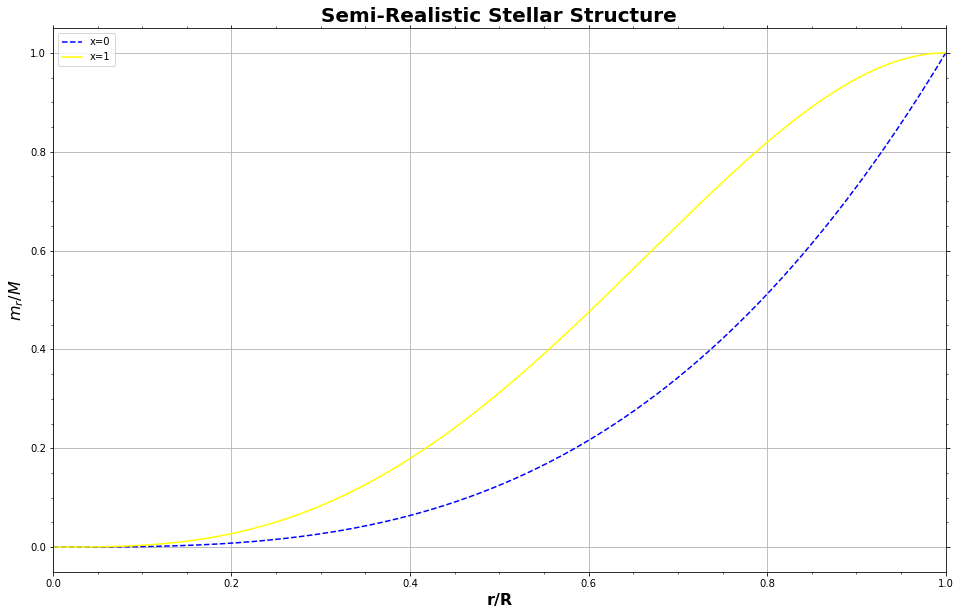

In [75]:
# x = 0 is a constant density, so then mr/M = 3(r/R)3
r = np.linspace(0, 1, 10000) #range needs to 0 to 1 to imply the center to surface of r/R
mM0 = (r**3)
plt.plot(r, mM0, c='b', ls='--', label='x=0')
plt.plot(r, mr_M(1, r), c='yellow', label='x=1')
plt.xlabel('r/R', fontsize=16)
plt.ylabel(r'$m_{r}/M$', fontsize=16)
plt.title('Semi-Realistic Stellar Structure', fontsize= 20)
plt.xlim(0,1)
plt.legend()
plt.grid();

In [3]:
mr_M(0, r)

ZeroDivisionError: division by zero

**Problem 3 (e)**

https://github.com/jieunchoi/MIST_codes
http://waps.cfa.harvard.edu/MIST/README_tables.pdf

In [30]:
import read_mist_models
eep = read_mist_models.EEP('0008590M.track.eep')

print('version: ', eep.version)
print('abundances: ', eep.abun)
print('rotation: ', eep.rot)
print('initial mass: ', eep.minit)
print('available columns: ', eep.hdr_list)

Reading in: 0008590M.track.eep
version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2694, 'Zinit': 0.0135898, '[Fe/H]': -0.02, '[a/Fe]': 0.0}
rotation:  0.0
initial mass:  0.859
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_

C:\Users\jjuni\OneDrive\Documents\SDSU\Spring2022\Astr630\HW\coding\read_mist_models.py:287: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


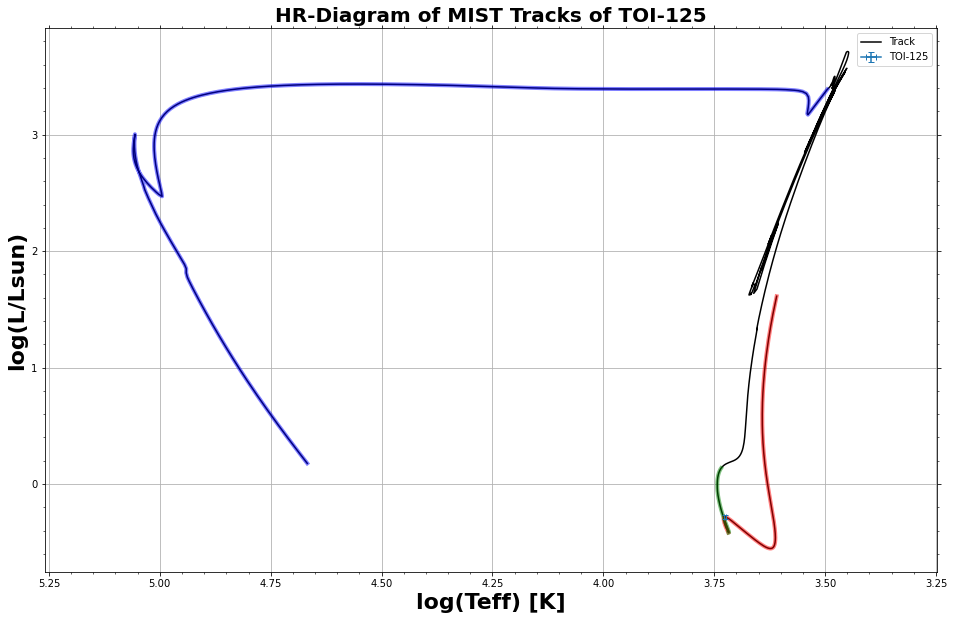

In [81]:
#ax = plt.subplot(111)
eep.plot_HR(color='Black', phases=[-1, 0, 6], phasecolor=['Red', 'Green', 'Blue'], label='Track')
#phases are Pre-MS [-1], Main-Sequence star [0] and post-asymptotic giant branch(AGB) [6]
plt.errorbar(np.log10(5320), np.log10(0.519), xerr=0.003183737743275718, yerr=0.016, label='TOI-125')
plt.title('HR-Diagram of MIST Tracks of TOI-125', fontsize= 20)
plt.legend()
plt.grid();

C:\Users\jjuni\OneDrive\Documents\SDSU\Spring2022\Astr630\HW\coding\read_mist_models.py:287: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


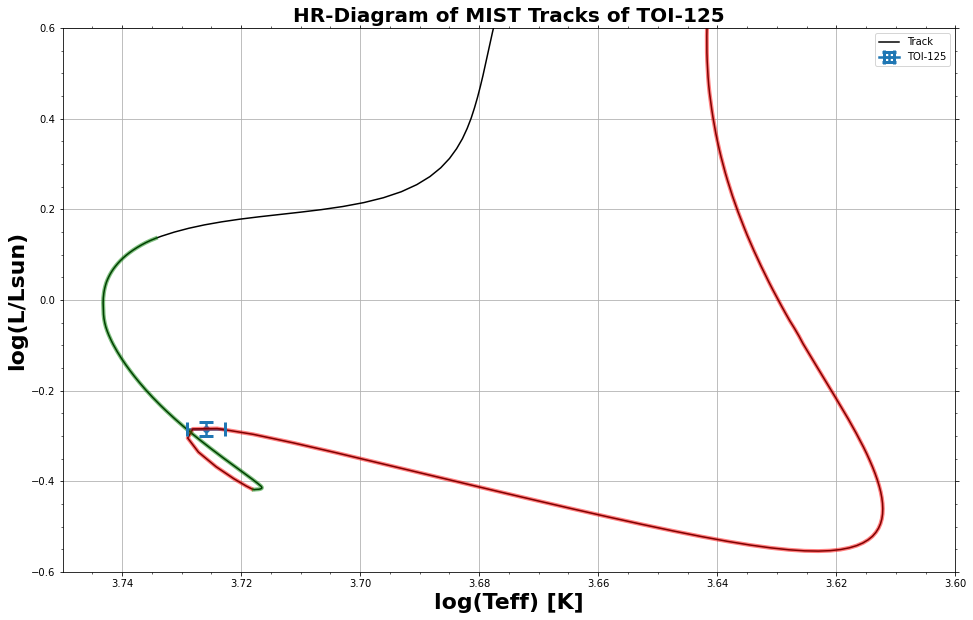

In [82]:
#Zoom in where the main-seq phase is (i.e. red phase) to see the star better
eep.plot_HR(color='Black', phases=[-1, 0], phasecolor=['Red', 'Green'], label='Track')
#phases are Main-Sequence star [0] and post-asymptotic giant branch(AGB) [6]
plt.scatter(np.log10(5320), np.log10(0.519))
plt.errorbar(np.log10(5320), np.log10(0.519), xerr=0.003183737743275718, yerr=0.016, lw=2.5, 
             capsize=7, capthick=3, label='TOI-125')
plt.title('HR-Diagram of MIST Tracks of TOI-125', fontsize= 20)
plt.xlim(3.75, 3.60)
plt.ylim(-0.6, 0.6)
plt.legend()
plt.grid();

Based on the position of TOI-125 with it's errorbars, the star appears to be in-between the pre-main sequence phase (shaded in red) and the main-sequence phase (shaded in green). On the plot alone, it would appear the star detected from TESS is in it's late stage of it's pre-main sequence. However, based on the calculations done by Nielsen et. al. (2020), TOI-125 should be considered as a main-sequence K0V star. This might do to using only effective temperature and luminosity that more parameters are required to determine it's main-sequence. It could also be that the temperature is higher than expected is the left errorbar for $T_{eff}$ ends right on the track of the main-sequence phase. 

In [14]:
eep

### Problem 5

**(a)** Using the table of elemental abundances for the solar photosphere from Asplund et al. (2009, calculate the mass fractions of the eight most numerically abundant elements (assume all other elements are not present). The abundances are given relative to hydrogen: Aelement = log(Nelement/NH ) + 12.0, where Nelement are the abundances by number. Based on these elements, what is the mass fraction of heavy elements Z?

|Element| $A_{element}$ | Molar Mass (u)|                         
| ---   | ---           | ---           |
|H      | 12.00         | 1.00784       |
|He     | 10.93         | 4.002602      |
|O      | 8.69          | 15.999        |
|C      | 8.43          | 12.0107       |
|Ne     | 7.93          | 20.1797       |
|N      | 7.83          | 14.0067       |
|Mg     | 7.60          | 24.305        |
|Si     | 7.51          | 28.0855       |

In [5]:
def mass_frac(M, N):
    N_EH = 10**(N-12.0)
    m = M*N_EH
    return m

#in order is H, He, O, C, Ne, N, Mg, Si
A_E = np.array([12.0, 10.93, 8.69, 8.43, 7.93, 7.83, 7.60, 7.51])
M = np.array([1.00784, 4.002602, 15.999, 12.0107, 20.1797, 14.0067, 24.305, 28.0855])

mass_frac(M, A_E)

array([1.00784000e+00, 3.40676681e-01, 7.83597133e-03, 3.23272171e-03,
       1.71757103e-03, 9.46969141e-04, 9.67599478e-04, 9.08828965e-04])

In [41]:
total_el = mass_frac(M, A_E)#total of all 8 elements including H and He
elementZ = total_el[2:] #only metals of the 8 chosen elements (excluding H and He)
elementH = total_el[0] #only hydrogen
elementHe = total_el[1] #only helium

X = np.sum(elementH)/np.sum(total_el)
Y = np.sum(elementHe)/np.sum(total_el)
Z = np.sum(elementZ)/np.sum(total_el)

print('The mass fractions of top 8 elements in the solar photosphere:')
print('X = {:.5f}'.format(X))
print('Y = {:.5f}'.format(Y))
print('Z = {:.5f}'.format(Z))

The mass fractions of top 8 elements in the solar photosphere:
X = 0.73882
Y = 0.24974
Z = 0.01144


**(b)** What are the solar number ratios relative to hydrogen ($N_{X} /N_{H}$) for species responsible for big spectral lines in stars (specifically, Na, Mg, Ca, Fe)? Explain why these metal lines can be strong in spite of the much larger abundance of hydrogen.

|Element| $A_{element}$ | Molar Mass (u)|                         
| ---   | ---           | ---           |
|Na     | 6.24          | 22.989769     |
|Mg     | 7.60          | 24.305        |
|Ca     | 6.34          | 40.078        |
|Fe     | 7.50          | 55.845        |

In [43]:
def N_frac(A):
    NE_NH = 10**(A-12.0)
    return NE_NH

#in order is H, He, O, C, Ne, N, Mg, Si
A_Eb = np.array([6.24, 7.60, 6.34, 7.50])

NXH = N_frac(A_Eb)
print('N_Na/N_H for Na is {}'.format(NXH[0]))
print('N_Mg/N_H for Mg is {}'.format(NXH[1]))
print('N_Ca/N_H for Ca is {}'.format(NXH[2]))
print('N_Fe/N_H for Fe is {}'.format(NXH[3]))

N_Na/N_H for Na is 1.7378008287493763e-06
N_Mg/N_H for Mg is 3.9810717055349695e-05
N_Ca/N_H for Ca is 2.1877616239495517e-06
N_Fe/N_H for Fe is 3.1622776601683795e-05


In [ ]:
#why we can see them in spectra is the atomic stucture and the state of the atoms

### HW 3 Collabrative Problem

Coordinates chosen in the area of Fomalhaut at RA: 22:57:39.04625 Dec: -29:37:20.0533
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Fomalhaut

Radius area of 500 degrees.

**Part (a)** Put together a query to the Gaia archive to obtain a sample of A-type stars with well-measured distances. 

In [44]:
import pandas as pd
data = pd.read_csv('1645676000901O-result.vot', names=True, delimiter=',') #csv data with header columns
data

TypeError: object of type 'bool' has no len()

In [76]:
gaia = np.genfromtxt('1645761134967O-result.csv', names=True, delimiter=',') #csv data with header columns
gaia

array([(6.86957782e+18, 294.2373841 , 0.03298482, -19.00162668, 0.02649647, 0.39618076, 0.03227984, 12.273316, -5.1525581 ,  -6.22295174, 14.313406, 0.5132065 , nan, nan, nan,  20.47750635, -1.83291222e+01, 7251.25, 0.4313, 0.2295, 1.8828254,  8.830114 ),
       (4.18583944e+17,   9.07158421, 0.01446125,  55.732844  , 0.01601462, 0.72010916, 0.02599763, 27.699034, -4.88739722,  -2.38235732, 12.990077, 0.46806717, nan, nan, nan, 120.78383083, -7.07569856e+00, 7527.5 , 0.4065, 0.1977, 1.7783095,  9.147712 ),
       (2.16363788e+18, 315.54812149, 0.01492117,  46.47967662, 0.01559148, 0.41991685, 0.017667  , 23.768436, -5.43353021,  -7.28617103, 13.679414, 0.5333977 , nan, nan, nan,  87.51315876, -1.94727619e-02, 7238.  , 0.5413, 0.243 , 2.3869097, 14.0877285),
       ...,
       (6.60848658e+18, 340.50392622, 0.0598152 , -29.54327431, 0.05578964, 3.7545806 , 0.06427656, 58.412903, 22.36655578, -11.55126696,  9.342904, 0.3268566 , nan, nan, nan,  20.37225629, -6.15100097e+01, 7535.  , 0.49

**(b)** Histogram your sample as a function of distance, and graph it on a log-log scale. If the sample had uniform density, what would the slope be? Does your sample look like that? Why or why not?

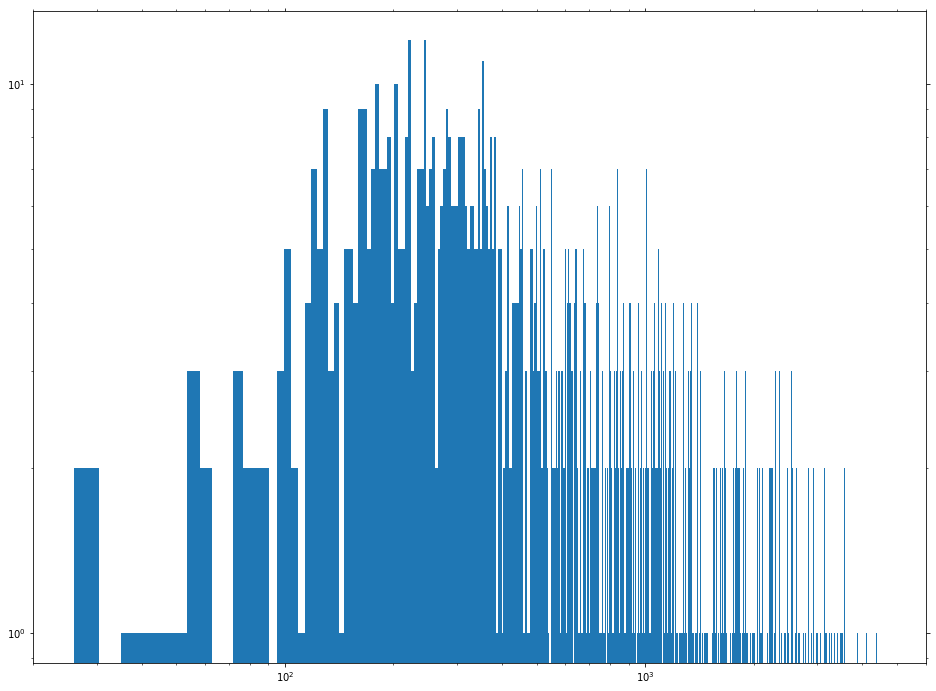

In [77]:
dist = 1/(gaia['parallax']*0.001) #distance (parsecs) = 1/parallax. 

plt.figure(figsize=(16,12))
plt.hist(dist, bins=1000)
plt.xscale('log')
plt.yscale('log');

**(c)** Plot your sample (but restricted to stars with E(BP − RP ) < 0.1) in RA/DEC and Galactocentric coordinates (b versus l), with the five closest A stars from your sample shown. Give the common names of the 5 stars.

<ipython-input-78-29373f362bc4>:1: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  w = gaia == gaia['e_bp_min_rp_val'] < 0.1


 ...]

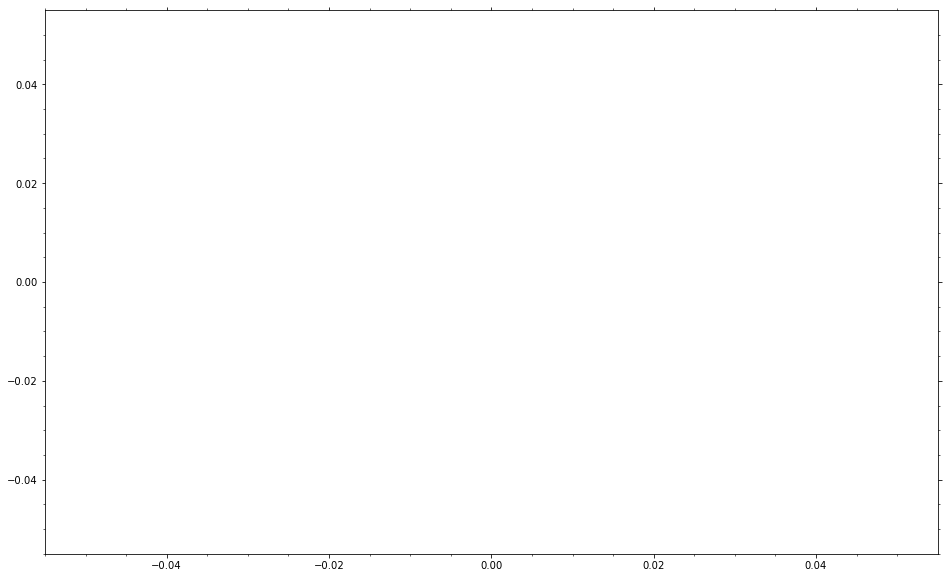

In [78]:
w = gaia == gaia['e_bp_min_rp_val'] < 0.1
gaia01 = gaia[w]
plt.plot(gaia01['b'], gaia01['l'])